# Frequency Filter

### Partnered with classmate to build a basic audio filtering tool that removes selected frequency ranges from a sound file using a real, discrete Fast Fourier Transform (FFT).

### Sound Filter (Fourier Transform)

#### Background:
Waveforms (radio, sound, and visual waves) are often expressed in amplitude versus time
- Useful for detecting changes in waveform over time, but not useful for detecting external factors 
    - May cause quality degradation: noise, faulty technology, or competing waveforms
    
- To look at all of the frequencies that form the components of a given sound wave, for example, it is necessary to express the wave in amplitude versus frequency instead.

#### Goal: 
We sought to create a program that allows users to pick a range of frequencies that the user wants to get rid of and the program will output the new sound file (graph) with the frequencies gone, by using a simple real, discrete Fast-Fourier Transform.

In [1]:
# Arrays and plotting
import numpy as np
import matplotlib.pyplot as plt

# Interactivity widgets
import ipywidgets as widgets 
from ipywidgets import interactive, interact

# Fourier transform functions and .wav file functionality
from scipy.fft import rfft, rfftfreq, irfft
from scipy.io.wavfile import read

In [23]:
from IPython.display import Image

fft = Image(filename='FFT Transform.png')
sf = Image(filename='Sound Filter.png')

## Breaking Down Signals: Sine Waves and Fourier Transform
- Sine waves are the fundamental building blocks of all periodic signals 
- Through Fourier Transform, any complex signal can be broken down into individual sine waves with their own frequency, phase, and amplitude.

## Constructing our own complex signal
- Create complex signal through adding multiple sine waves
    - Rate (Sampling Rate): 44100 Hz is the standard sampling rate (usually for CD audio)
    - Dur (Duration): The length of the signal in seconds
    - Freq (Frequency): The number of cycles of a sound wave (1 Hz = 1 cycle)

In [3]:
# Sample rate
rate = 44100 
# Duration in seconds
dur = 5 

# Create a sine wave with a given frequency, rate, and duration
def generateSineWave(freq, rate, duration):
    x = np.linspace(0, duration, rate*duration, endpoint = False)
    y = np.sin(2*np.pi*freq*x)
    return x, y

# Generate two sine waves with different frequencies 
x, y2 = generateSineWave(2, rate, dur)
x, y1 = generateSineWave(100, rate, dur)

Text(0.5, 1.0, 'Complex Signal (Time Domain)')

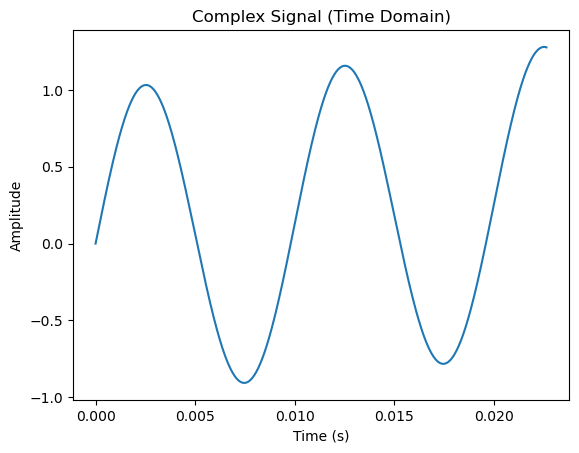

In [35]:
# Add sine waves together to create a complex signal
y = y1 + y2
plt.plot(x[:1000],y[:1000])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Complex Signal (Time Domain)')

## Applying Fourier Transform

In [27]:
# Number of samples
N = rate * dur
# Apply Fourier Transform
xf = rfftfreq(N,1/rate)
yf = rfft(y)

(0.0, 150.0)

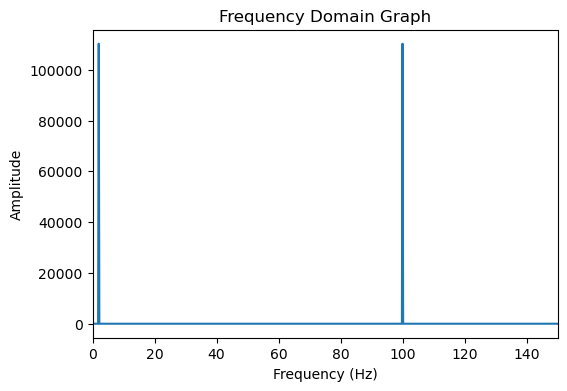

In [26]:
fig, ax = plt.subplots(figsize = (6,4))
plt.title('Frequency Domain Graph')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.plot(xf,np.abs(yf))
plt.xlim(0,150)

Text(0.5, 0, 'Time (s)')

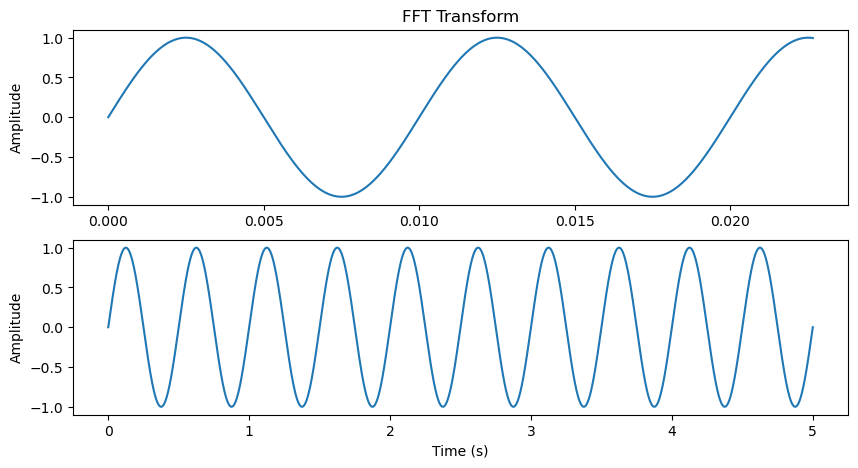

In [32]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,5))
ax[0].plot(x[:1000], y1[:1000])
ax[0].set_ylabel('Amplitude')
ax[0].set_title('FFT Transform')
ax[1].plot(x,y2)
ax[1].set_ylabel('Amplitude')

plt.xlabel('Time (s)')

## Why is this important?
- Fourier Transform is an essential tool in sound filtering
    - Analysis and manipulation in frequency domain
    - Decomposing complex signals
    - Isolate and remove unwanted frequencies

In [9]:
from scipy.io.wavfile import write

In [10]:
# Sample rate
rate = 44100 
# Duration in seconds
dur = 5
# Frequency in Hertz
freq = 100
# Number of samples
N = rate*dur

# Initialize list to store filtered signals
emptylist = []

# Function filters sine wave frequencies
def filter(f):
    fig, ax = plt.subplots(figsize=(15,6))
    
    # Create x values spanning the length of duration with 'N' number of points
    x = np.linspace(0, dur, N, endpoint = False)
    # Create sine wave 
    y = np.sin(2*np.pi*freq*x)
    
    # Perform Fourier Transform to convert to frequency domain
    yf = rfft(y)
    xf = rfftfreq(N, 1/rate)
    
    # Zeroing out all frequencies above 'f'
    yf[f:] = 0
    #plt.plot(xf,np.abs(yf))
    
    # Perform Inverse Fourier Transform
    filtered = irfft(yf)
    
    # Plotting filtered signal 
    plt.plot(filtered[:2000], label="filtered")
    ax.legend()
    
    # Converting filtered signal into 16-bit form and appending to list
    emptylist.append(np.int16(filtered/filtered.max()*32767))

In [11]:
freq_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=5000,
    step=1,
    description='Frequency:',
)

#Integer range slider returns a tuple (min, max)
freqRangeSlider = widgets.IntRangeSlider(
    value=[0, 5000],
    min=0,
    max=5000,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [12]:
interactivePlot = interact(filter, f = freq_slider)
write("test2.wav",rate,emptylist[0])

interactive(children=(IntSlider(value=1, description='Frequency:', max=5000, min=1), Output()), _dom_classes=(…

## Practical Application of Sound Filtering utilizing Fourier Transform

Creating a multi-tone signal
- Utilize sine wave function to create individual sine waves
- Combine multiple sine waves at varying frequencies to create complex signal
- Save resulting signal as a .wav file (let's listen!)

In [15]:
# Generate a sine wave with a given frequency, bitrate, and duration in seconds
def generateSineWave2(freq, rate, duration):
    x = np.linspace(0, duration, rate*duration, endpoint=False) #minimum, maximum, n=number of points, endpoint=False resolves zero-indexing issues
    y = np.sin(2*np.pi*freq*x) #The value of the sine wave at a given time x
    return x, y

# Generate a multitone sinelike wave with given frequencies, bitrate, and duration in seconds
def generateMultiTone(freqs, rate, dur, norm=True):
    x, tone = generateSineWave2(freqs[0], rate, dur)
    signal = np.zeros_like(tone)
    for freq in freqs:
        _, tone = generateSineWave2(freq, rate, dur)
        signal += tone
    if norm:
        signal = np.int16((signal/signal.max())*32767)
    return x, signal

x, signal = generateMultiTone([4,40,400,4000], rate, dur)

Text(0, 0.5, 'Amplitude')

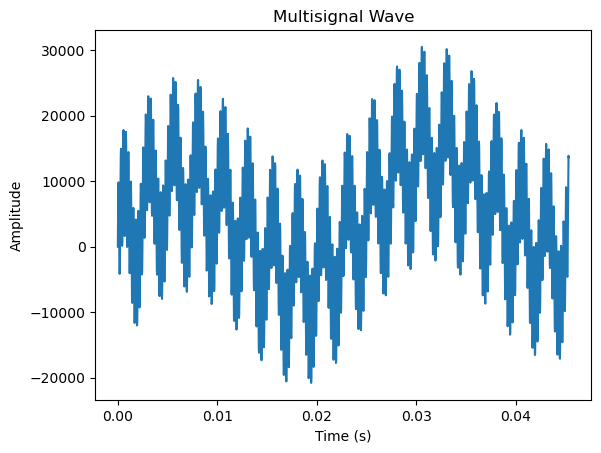

In [36]:
# Write demonstration wave to .wav file
write('demoMulti.wav', rate, signal)
plt.plot(x[:2000], signal[:2000])
plt.title("Multisignal Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Create interactive tool to filter multi-tone signal
- Define function that takes in tuple (pair of values that represents the minimum and maximum frequency values)
    - Apply Fourier Transform
    - Zeros out unwanted frequencies (provided by frequency widget)
    - Apply Inverse Fourier Transform
    - Output filtered signal

In [14]:
# Use a simple, real, discrete fast-Fourier Transform on a given multifrequency wave
def filter2(tuple):
    N = rate*dur
    yf = rfft(signal)
    xf = rfftfreq(N, 1/ rate)
    #plt.plot(xf, np.abs(yf))
    
    minmax = list(tuple)
    yf[minmax[0]*dur:minmax[1]*dur] = 0 
    plt.plot(xf[0:21000], np.abs(yf)[0:21000])
    plt.title("FFT Transform")
    plt.xlabel("Frequencies")
    plt.ylabel("Amplitude")
 
    newSignal = irfft(yf)
    #plt.plot(x[:2000], newSignal[:2000])
    newSignal = np.int16((newSignal/newSignal.max())*32767)
    write('demoMultiFiltered.wav', rate, newSignal)
    
interactivePlot = interact(filter2, tuple = freqRangeSlider)

interactive(children=(IntRangeSlider(value=(0, 5000), continuous_update=False, description='Test:', max=5000),…

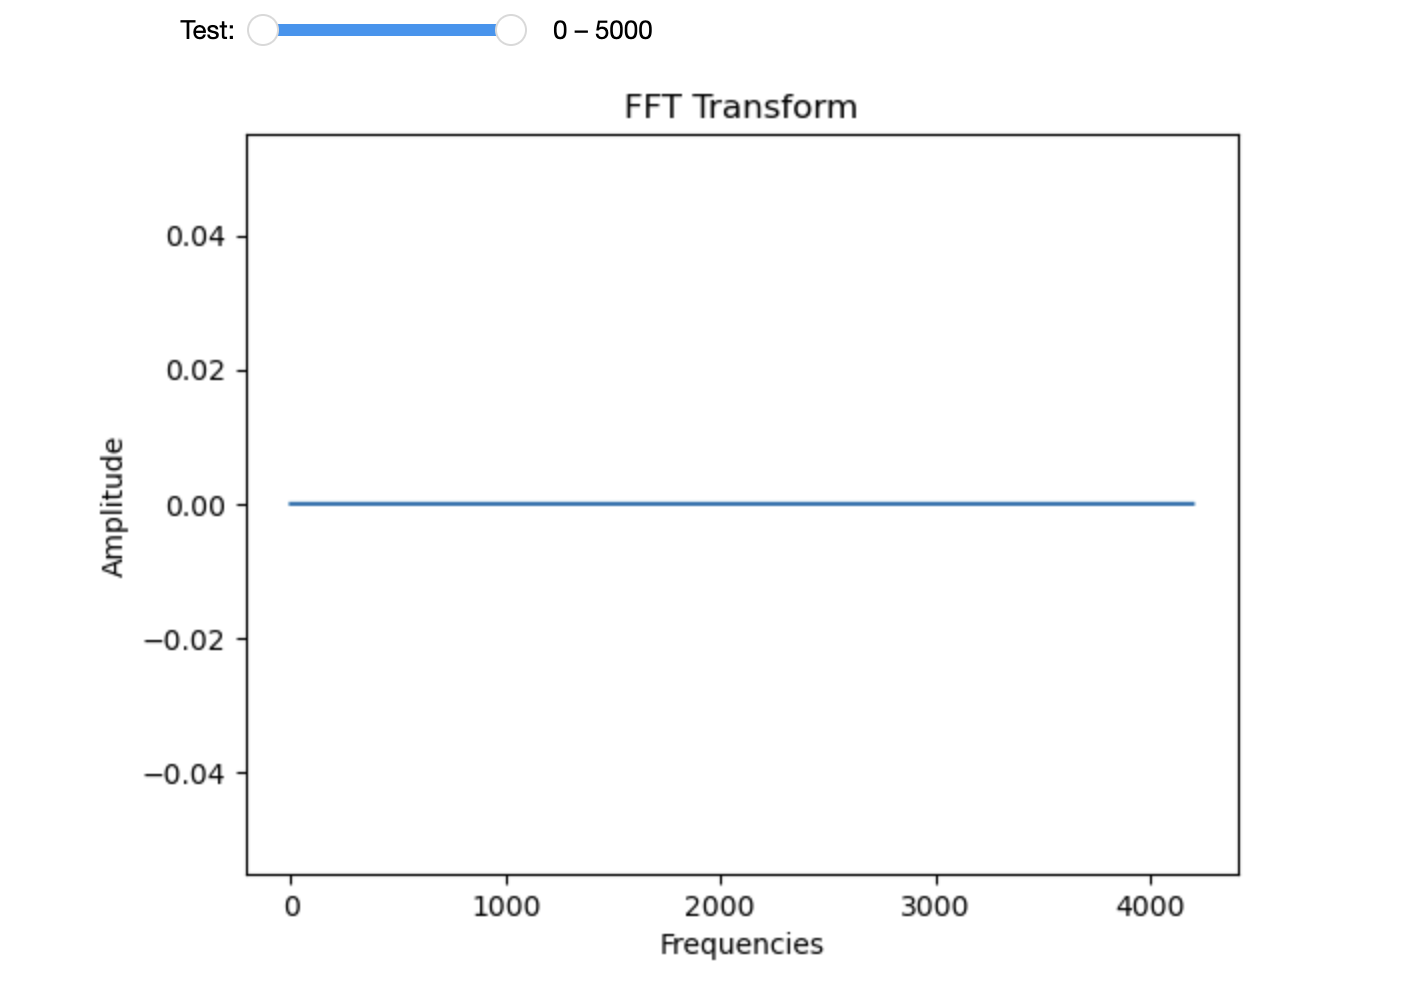

In [22]:
fft

## Filtering music
Applying previous logic, let's filter actual music!!
- Create interactive plot allowing users to choose a song, range of frequencies (to filter out), and ability to export filtered signal

In [19]:
def filtersong(song, freqRange, export):

    # Set up subplots
    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(15,13))
    
    # Defining file name
    file = f"{song}.wav"
    
    # Read file as sample_rate (# of samples) and data (amplitude)
    sample_rate, data = read(file)
    
    # Number of data points
    N = len(data)

    # Perform Fourier Transform to convert into frequency domain
    yf = rfft(data)
    xf = rfftfreq(N, 1/ sample_rate)
    
    # Extract and zero out frequency according to given range
    minmax = list(freqRange)
    yf[minmax[0]*15:minmax[1]*15] = 0 
    
    # Plot filtered frequency graph
    ax[0].plot(xf, np.abs(yf))
    ax[0].set_title(f'FFT of {song}')
    ax[0].set_xlabel("Frequencies")
    ax[0].set_ylabel("Amplitude")
    
    # Apply inverse Fourier Transform
    filtered_song = irfft(yf)
    
    # Plot new filtered signal
    
    ax[1].plot(filtered_song[:1000], )
    ax[1].set_title(f'Filtered Signal of {song}')
    ax[1].set_xlabel("Time(s)")
    ax[1].set_ylabel("Amplitude")
    
    # Convert filtered signal into 16-bit form
    filtered_song = np.int16((filtered_song/filtered_song.max())*32767)
    
    # If user presses export button, filtered signal will be written and saved
    if export == True:
        write(f'{song} Filtered.wav', rate, filtered_song)

In [18]:
sample_rate = 44100
songs = [
    'Sienna - The Marias',
    'HOT TO GO! - Chappell Roan',
    'Delete Ya - DJO',
    'Sympathy is a knife - Charli xcx featuring Ariana Grande',
    'Bends - Carly Rae Jepsen'
]

RangeSlider = widgets.IntRangeSlider(
    value=[100, 1000],
    min=1,
    max=sample_rate/2,
    step=1,
    description='Frequency:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
    
song_selection = widgets.Dropdown(
    options = songs,
    description='Song:'
)

exportFile = widgets.ToggleButton(
    value=False,
    description='Export Song',
    disabled=False,
    button_style='success',
    tooltip='Description',
    icon='check' 
)

In [20]:
InteractiveSong = interact(filtersong, song = song_selection, freqRange = RangeSlider, export = exportFile)

interactive(children=(Dropdown(description='Song:', options=('Sienna - The Marias', 'HOT TO GO! - Chappell Roa…

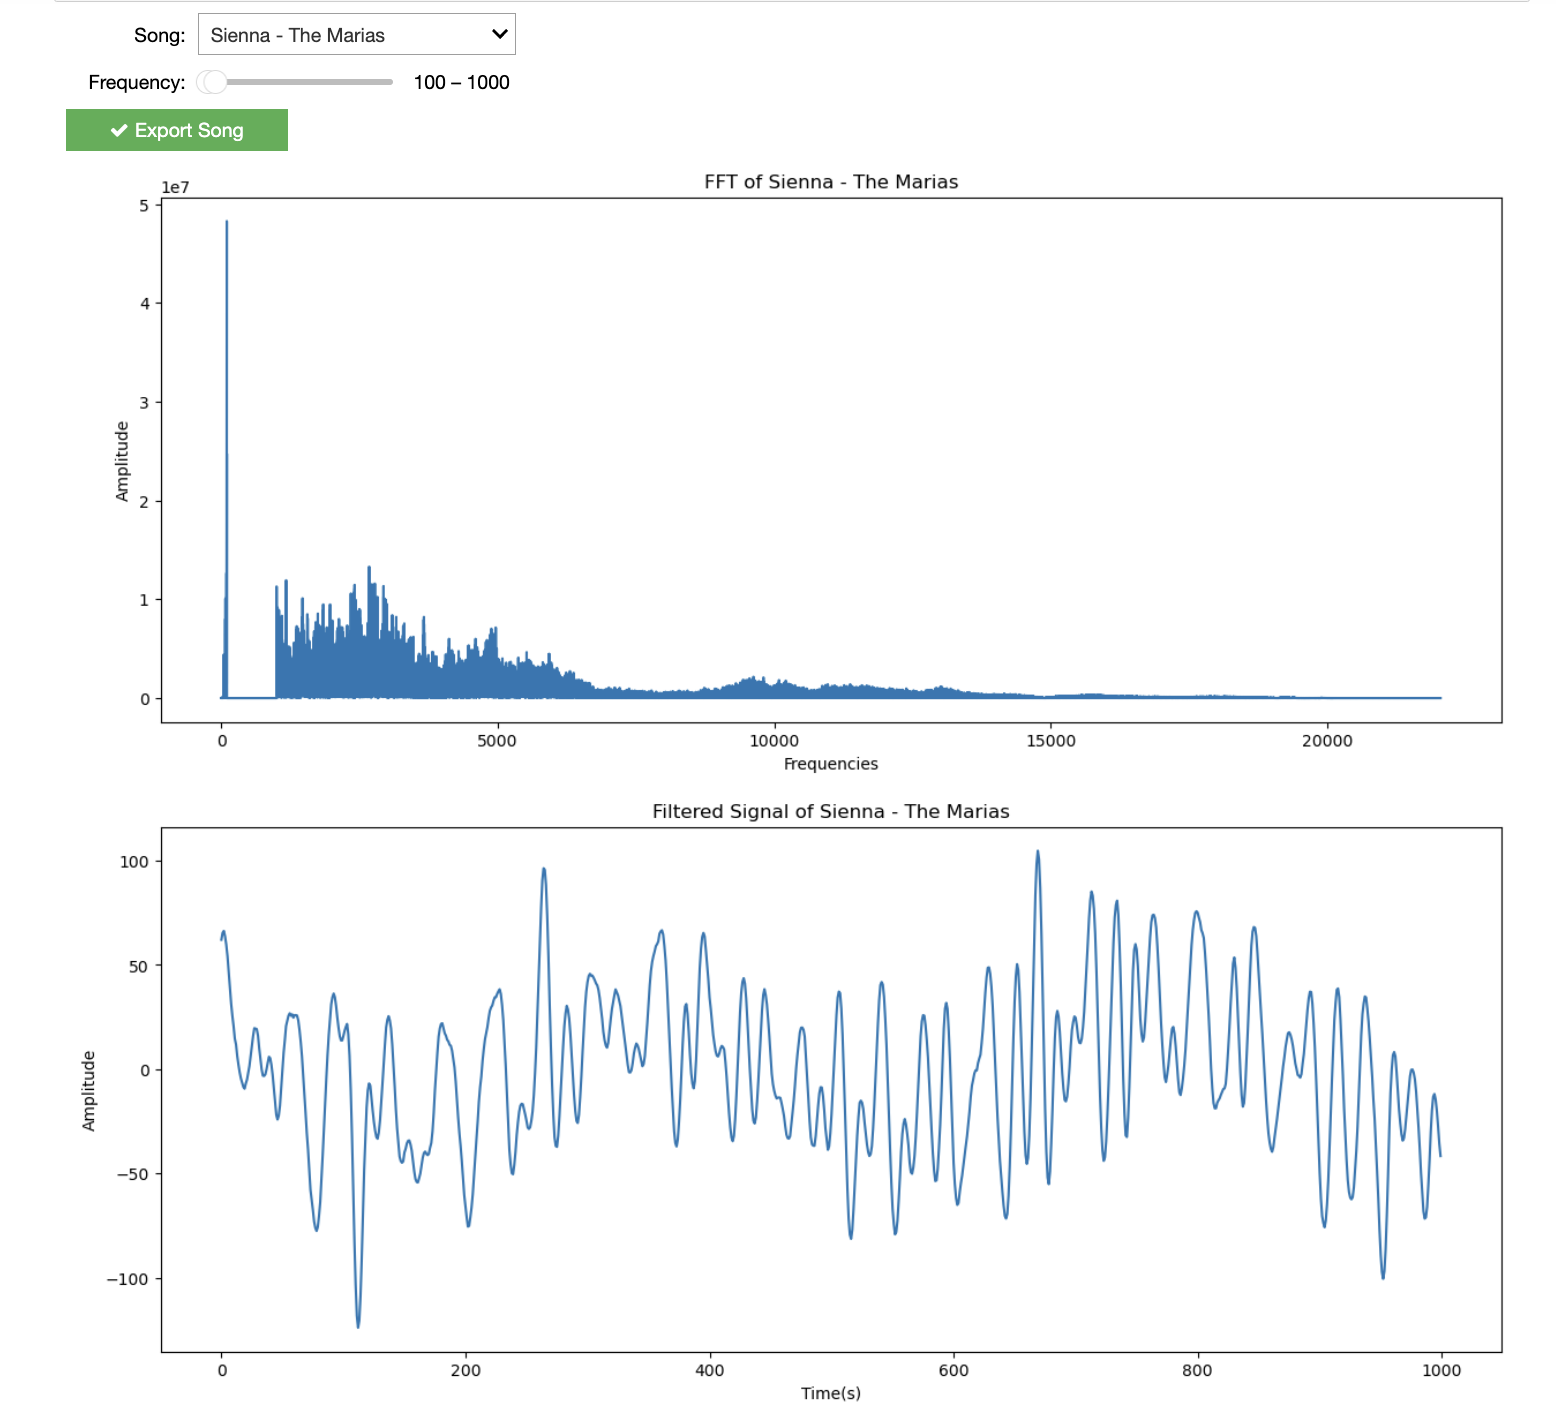

In [24]:
sf